In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Mengubah parameter default matplotlib
Parameter default matplotlib dapat diubah dengan rcParams sebagai berikut


In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 2
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# STEP 1 : PRE-PROCESSING

## Load dataset

Load dataset yang ingin dipre-process dengan menggunakan `pd.read_csv()`.

In [3]:
df = pd.read_csv('train-data.csv')
df.sample(5)

,No,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
1103,1103,Tata Hexa XT,Delhi,2017,55000,Diesel,Manual,First,17.6 kmpl,2179 CC,153.86 bhp,7.0,19.86 Lakh,12.00
2527,2527,Hyundai Santro Xing XO CNG,Pune,2005,100000,CNG,Manual,Third,17.0 km/kg,1086 CC,null bhp,5.0,NaN,1.20
3827,3827,Hyundai Xcent 1.2 Kappa SX Option,Bangalore,2016,50000,Petrol,Manual,First,19.1 kmpl,1197 CC,82 bhp,5.0,NaN,2.50
2459,2459,Ford EcoSport 1.5 Diesel Titanium,Mumbai,2017,30000,Diesel,Manual,First,23.0 kmpl,1498 CC,98.96 bhp,5.0,11.89 Lakh,8.99
2071,2071,Chevrolet Beat LT,Pune,2011,65000,Petrol,Manual,Second,18.6 kmpl,1199 CC,79.4 bhp,5.0,NaN,2.50


Pastikan isi dataset dengan menggunakan `df.info()` dan `df.describe()`. Pisahkan kolom menjadi numerik dan kategorikal apabila diperlukan.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No                 6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


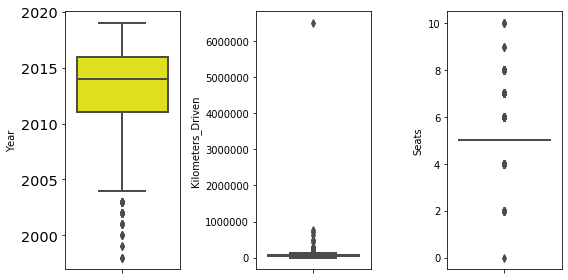

In [5]:
nums = ['Year','Kilometers_Driven','Seats']
features = nums
plt.figure(figsize=(8,4))
for i in range(0, len(features)):
    plt.subplot(1,len(features), i+1)
    sns.boxplot(df[features[i]], color='yellow',orient='v')
    plt.rc('ytick', labelsize=10)
    plt.tight_layout()

D:\Work\AnacondaPhyton\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


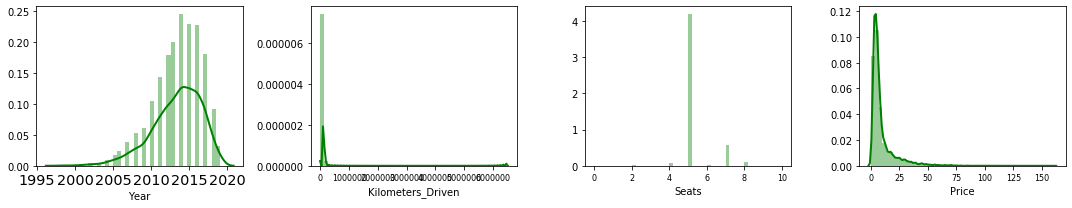

In [6]:
nums = ['Year','Kilometers_Driven','Seats','Price']
features = nums
plt.figure(figsize=(15,3))
for i in range(0,len(features)):
    plt.subplot(1,len(features),i+1)
    sns.distplot(df[features[i]],color='green')
    plt.rc('xtick', labelsize=8)
    plt.tight_layout()

In [7]:
car_business = df.groupby('Year').agg({'Kilometers_Driven':['sum'],'Price':['count']}).reset_index()
car_business.describe()

,Year,Kilometers_Driven,Price
,,sum,count
count,22.000000,2.200000e+01,22.000000
mean,2008.500000,1.607029e+07,273.590909
std,6.493587,1.606432e+07,286.405749
min,1998.000000,2.100000e+05,2.000000
25%,2003.250000,1.554247e+06,20.500000
50%,2008.500000,9.094397e+06,149.500000
75%,2013.750000,3.067726e+07,551.500000
max,2019.000000,4.512241e+07,797.000000


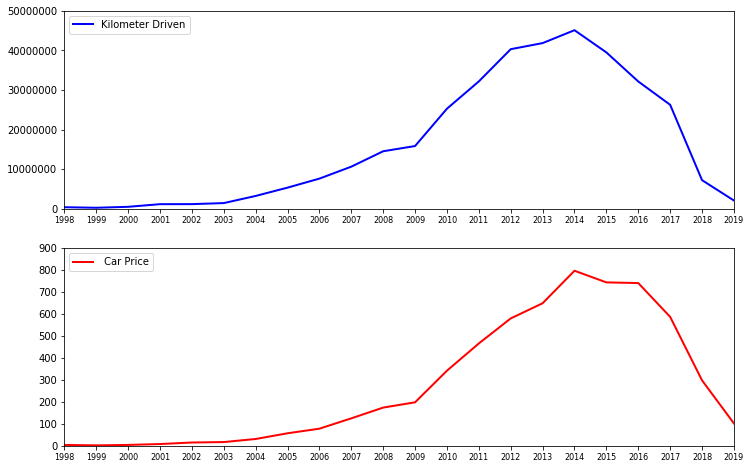

In [8]:
year = car_business['Year']
Kilometer = car_business['Kilometers_Driven']
Price = car_business['Price']

fig, ax = plt.subplots(2, 1, figsize = (12, 8))
ax[0].plot(year, Kilometer, color ='blue', label = "Kilometer Driven")
ax[1].plot(year, Price, color ='red', label = " Car Price")

ax[0].set_xlim(1998, 2019)
ax[0].set_ylim(0, 50000000)
ax[0].ticklabel_format(useOffset=False, style='plain')


ax[1].set_xlim(1998, 2019)
ax[1].set_ylim(0, 900)

ax[0].set_xticks(range(1998, 2020, 1));
ax[1].set_xticks(range(1998, 2020, 1));


ax[0].legend(loc = 'upper left')
ax[1].legend(loc = 'upper left')

plt.show()

## Missing Data

Pertama, kita akan menangani data-data yang hilang. Cek jumlah data yang hilang dengan menggunakan `df.isna().sum()`.

In [9]:
df.isna().sum()

No                      0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

### Drop

Berdasarkan EDA, berikut feature yang tidak digunakan: `Unnamed`, `Name`, `New_Price`.<br>
Feature `Mileage`, `Engine`, dan `Power` di dataframe masih berupa type object/string dan akan kita ubah ke type numerik, dengan demikian baris yang kosong dihilangkan untuk mengurangi error.

In [10]:
df = df.drop(df.columns[[0]],axis=1)
df = df.drop(['Name','New_Price'],axis=1)
df.dropna(subset=['Mileage','Engine','Power','Seats'], inplace=True)
df.isna().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

## Feature Engineering

Ubah dari object ke numerik untuk feature-feature `nums` yang belum dalam bentuk numerik:

In [11]:
#Milaege
df['Mile'] = df.Mileage.str.split().str.get(0)
df['Satuan'] = df.Mileage.str.split().str.get(1)
df['Mile'] = pd.to_numeric(df['Mile']) 
df['Mpg'] = df.apply(lambda df: df[['Mile']]/0.669 if df['Satuan'] == 'kmpl' 
     else df[['Mile']]/0.827, axis=1)
df = df.drop(['Mileage','Mile','Satuan'],axis=1)
## 1 Liter petrol = 0.669USD
## 1 Kg LPG = 0.827USD

#Engine
df['Engine'] = df.Engine.str.split().str.get(0)
df['Engine'] = pd.to_numeric(df['Engine']) 

#Power
df['Power'] = df.Power.str.split().str.get(0)
df['Power'] = pd.to_numeric(df['Power'], errors='coerce')

df.info() #cek tipe data apakah sudah sesuai

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5975 non-null   object 
 1   Year               5975 non-null   int64  
 2   Kilometers_Driven  5975 non-null   int64  
 3   Fuel_Type          5975 non-null   object 
 4   Transmission       5975 non-null   object 
 5   Owner_Type         5975 non-null   object 
 6   Engine             5975 non-null   int64  
 7   Power              5872 non-null   float64
 8   Seats              5975 non-null   float64
 9   Price              5975 non-null   float64
 10  Mpg                5975 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 560.2+ KB


In [12]:
nums = ['Year', 'Kilometers_Driven', 'Engine', 'Power', 'Seats', 'Price','Mpg']

In [13]:
df.isna().sum() #cek apa ada null

Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Engine                 0
Power                103
Seats                  0
Price                  0
Mpg                    0
dtype: int64

In [14]:
df.dropna(subset=['Power'], inplace=True) #hapus data null
df.isna().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Engine               0
Power                0
Seats                0
Price                0
Mpg                  0
dtype: int64

## Outliers

Outlier ditangani karena distribusi data tidak normal.

### Menggunakan Z-score

In [15]:
from scipy import stats

In [16]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in nums:
    zscore = abs(stats.zscore(df[col]))
    filtered_entries = (zscore < 3) & filtered_entries
    
df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 5872
Jumlah baris setelah memfilter outlier: 5485


### Menggunakan IQR

In [17]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([False] * len(df))
for col in nums:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) | filtered_entries
    
df = df[filtered_entries]


print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 5485
Jumlah baris setelah memfilter outlier: 5485


### Normalization/Standardization

In [18]:
df.describe()

,Year,Kilometers_Driven,Engine,Power,Seats,Price,Mpg
count,5485.000000,5485.000000,5485.000000,5485.000000,5485.000000,5485.000000,5485.000000
mean,2013.565907,56144.528897,1561.012397,108.266456,5.222242,8.309513,27.831353
std,2.981998,32358.294840,519.354496,44.281296,0.654347,7.795365,5.992160
min,2004.000000,171.000000,624.000000,34.200000,4.000000,0.440000,12.257100
25%,2012.000000,33900.000000,1197.000000,74.000000,5.000000,3.500000,23.916293
50%,2014.000000,52373.000000,1461.000000,90.000000,5.000000,5.530000,27.802691
75%,2016.000000,72000.000000,1968.000000,134.000000,5.000000,9.290000,31.988042
max,2019.000000,300000.000000,3200.000000,270.900000,7.000000,43.300000,42.451420


Setelah semua data numerik disesuaikan tipenya menjadi numerik, cek kembali distribusi tiap feature numerik.

Text(0.5, 1.0, 'Count of the cars as per the year of sales')

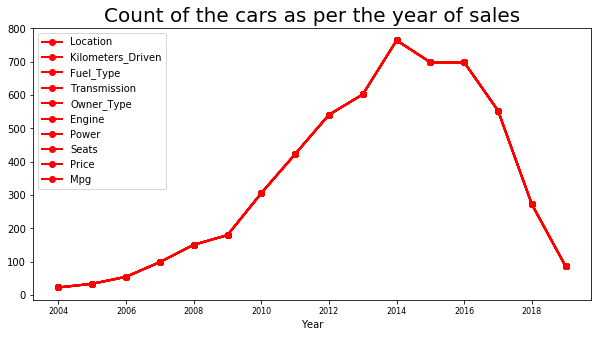

In [19]:
df.groupby('Year').count().plot(figsize=(10,5),marker='o',color='r')
plt.title("Count of the cars as per the year of sales", fontsize=20,ha='center')

D:\Work\AnacondaPhyton\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


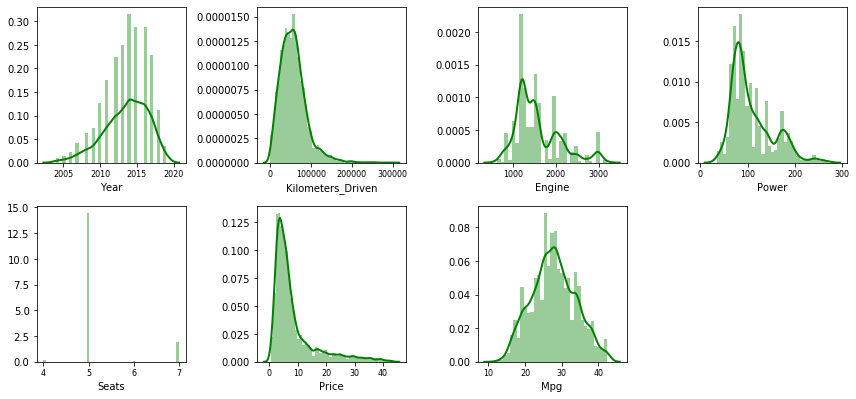

In [20]:
features = nums
plt.figure(figsize=(12,8))
for i in range(0,len(features)):
    plt.subplot(3,4,i+1)
    sns.distplot(df[features[i]],color='green')
    plt.tight_layout()

Text(0.5, 1.0, 'Kilometers driven over the course of years')

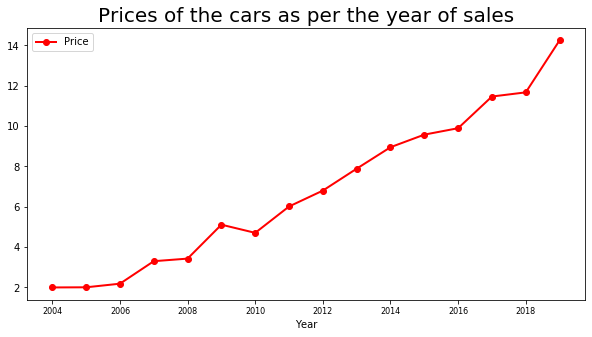

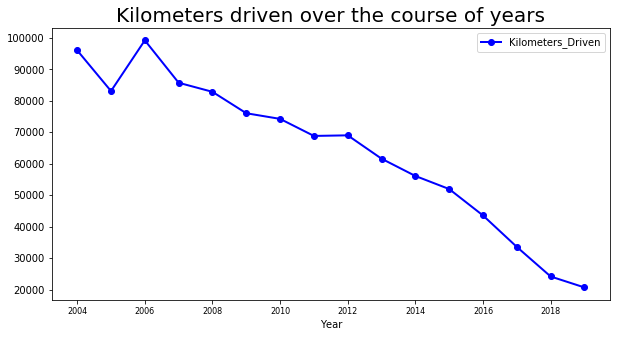

In [21]:
df.groupby('Year')[['Price']].mean().plot(figsize=(10,5),marker='o',color='r')
plt.title("Prices of the cars as per the year of sales", fontsize=20,ha='center')
df.groupby('Year')[['Kilometers_Driven']].mean().plot(figsize=(10,5),marker='o',color='b')
plt.title("Kilometers driven over the course of years", fontsize=20,ha='center')

Normalisasi/Standardisasi dilakukan untuk mengimprove performa model. Ketika selesai, hapus semua feature numerik yang sudah tidak terpakai.

In [22]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df['year_norm'] = MinMaxScaler().fit_transform(df['Year'].values.reshape(len(df), 1))
df['km_norm'] = MinMaxScaler().fit_transform(df['Kilometers_Driven'].values.reshape(len(df), 1))
df['engine_norm'] = MinMaxScaler().fit_transform(df['Engine'].values.reshape(len(df), 1))
df['power_norm'] = MinMaxScaler().fit_transform(df['Power'].values.reshape(len(df), 1))
df['seat_norm'] = MinMaxScaler().fit_transform(df['Seats'].values.reshape(len(df), 1))
df['price_norm'] = MinMaxScaler().fit_transform(df['Price'].values.reshape(len(df), 1))
df['mileage_norm'] = MinMaxScaler().fit_transform(df['Mpg'].values.reshape(len(df), 1))

df = df.drop(['Year', 'Kilometers_Driven', 'Engine', 'Power', 'Seats', 'Price','Mpg'],axis=1)
df.sample()

,Location,Fuel_Type,Transmission,Owner_Type,year_norm,km_norm,engine_norm,power_norm,seat_norm,price_norm,mileage_norm
3026,Bangalore,Petrol,Manual,Second,0.733333,0.129504,0.222438,0.201225,0.333333,0.136724,0.514851


In [23]:
df.describe() #cek apakah normalisasi/standardisasi sudah benar

,year_norm,km_norm,engine_norm,power_norm,seat_norm,price_norm,mileage_norm
count,5485.000000,5485.000000,5485.000000,5485.000000,5485.000000,5485.000000,5485.000000
mean,0.637727,0.186685,0.363747,0.312913,0.407414,0.183610,0.515801
std,0.198800,0.107922,0.201613,0.187078,0.218116,0.181880,0.198453
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.533333,0.112494,0.222438,0.168145,0.333333,0.071395,0.386139
50%,0.666667,0.174106,0.324922,0.235741,0.333333,0.118759,0.514851
75%,0.800000,0.239567,0.521739,0.421631,0.333333,0.206486,0.653465
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5485 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Location      5485 non-null   object 
 1   Fuel_Type     5485 non-null   object 
 2   Transmission  5485 non-null   object 
 3   Owner_Type    5485 non-null   object 
 4   year_norm     5485 non-null   float64
 5   km_norm       5485 non-null   float64
 6   engine_norm   5485 non-null   float64
 7   power_norm    5485 non-null   float64
 8   seat_norm     5485 non-null   float64
 9   price_norm    5485 non-null   float64
 10  mileage_norm  5485 non-null   float64
dtypes: float64(7), object(4)
memory usage: 514.2+ KB


## Feature Encoding

Feature Encoding dilakukan untuk feature kategori: `Location`,`Fuel_Type`,`Transmission`,`Owner_Type`

In [25]:
cats = ['Location','Fuel_Type','Transmission','Owner_Type']
df[cats].describe()

,Location,Fuel_Type,Transmission,Owner_Type
count,5485,5485,5485,5485
unique,11,4,2,4
top,Mumbai,Diesel,Manual,First
freq,725,2864,3991,4541


Cek dan hapus duplikasi data setelah dilakukan data cleansing.

In [26]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

2
0


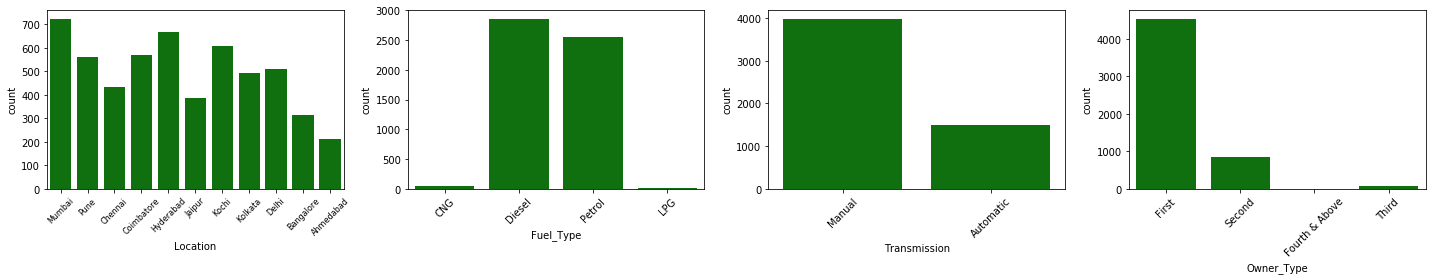

In [27]:
features = cats
plt.figure(figsize=(20,4)) #x=12in y=6in
for i in range(0, len(features)):
    plt.subplot(1,len(features),i+1)
    sns.countplot(df[features[i]], color='green')
    plt.xticks(rotation=45)
    plt.rc('xtick', labelsize=10)
    plt.tight_layout()

Teknik Feature Encoding yang dipakai adalah <b>One-hot Encoding</b> karena jumlah data unique di masing-masing feature tidak menyaingi jumlah barisnya. Kemudian hapus feature category yang sudah tidak dipakai untuk model.

In [28]:
for cat in cats:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

df = df.drop(cats,axis=1)
df.columns

Index(['year_norm', 'km_norm', 'engine_norm', 'power_norm', 'seat_norm',
       'price_norm', 'mileage_norm', 'Location_Ahmedabad',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Automatic', 'Transmission_Manual',
       'Owner_Type_First', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third'],
      dtype='object')

In [29]:
df.sample()

,year_norm,km_norm,engine_norm,power_norm,seat_norm,price_norm,mileage_norm,Location_Ahmedabad,Location_Bangalore,Location_Chennai,...,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
5718,0.533333,0.244569,0.300854,0.142797,0.333333,0.050397,0.584158,0,0,0,...,0,1,0,0,0,1,0,0,1,0


### Mengatur Urutan Kolom

Agar lebih mudah diolah, kolom `Price` dipindah ke kolom paling kanan.

In [48]:
cols = list(df.columns.values)

In [49]:
cols

['year_norm',
 'km_norm',
 'engine_norm',
 'power_norm',
 'seat_norm',
 'mileage_norm',
 'Location_Ahmedabad',
 'Location_Bangalore',
 'Location_Chennai',
 'Location_Coimbatore',
 'Location_Delhi',
 'Location_Hyderabad',
 'Location_Jaipur',
 'Location_Kochi',
 'Location_Kolkata',
 'Location_Mumbai',
 'Location_Pune',
 'Fuel_Type_CNG',
 'Fuel_Type_Diesel',
 'Fuel_Type_LPG',
 'Fuel_Type_Petrol',
 'Transmission_Automatic',
 'Transmission_Manual',
 'Owner_Type_First',
 'Owner_Type_Fourth & Above',
 'Owner_Type_Second',
 'Owner_Type_Third',
 'price_norm']

In [50]:
df = df[['year_norm',
 'km_norm',
 'engine_norm',
 'power_norm',
 'seat_norm',
 'mileage_norm',
 'Location_Ahmedabad',
 'Location_Bangalore',
 'Location_Chennai',
 'Location_Coimbatore',
 'Location_Delhi',
 'Location_Hyderabad',
 'Location_Jaipur',
 'Location_Kochi',
 'Location_Kolkata',
 'Location_Mumbai',
 'Location_Pune',
 'Fuel_Type_CNG',
 'Fuel_Type_Diesel',
 'Fuel_Type_LPG',
 'Fuel_Type_Petrol',
 'Transmission_Automatic',
 'Transmission_Manual',
 'Owner_Type_First',
 'Owner_Type_Fourth & Above',
 'Owner_Type_Second',
 'Owner_Type_Third','price_norm']]

In [51]:
df.sample(5)

,year_norm,km_norm,engine_norm,power_norm,seat_norm,mileage_norm,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,price_norm
5675,0.600000,0.087146,0.121118,0.098859,0.333333,0.853465,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0.055063
1522,0.800000,0.048861,0.222826,0.222222,0.333333,0.554455,0,0,0,1,...,0,0,1,0,1,1,0,0,0,0.115026
5646,0.733333,0.172862,0.242236,0.229404,0.333333,0.984653,1,0,0,0,...,1,0,0,0,1,1,0,0,0,0.150723
777,0.533333,0.222890,0.371894,0.389185,0.333333,0.699010,0,1,0,0,...,1,0,0,0,1,1,0,0,0,0.135558
5997,0.400000,0.232896,0.145186,0.101394,0.333333,0.643289,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0.042697


## Cek Korelasi antar fitur

In [52]:
%matplotlib inline

sns.set(rc={'figure.figsize':(20.7,20.7)})
sns.set_style("dark")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

Dengan plot heatmap correlation berikut, cek apakah ada feature yang berkorelasi sangat tinggi.

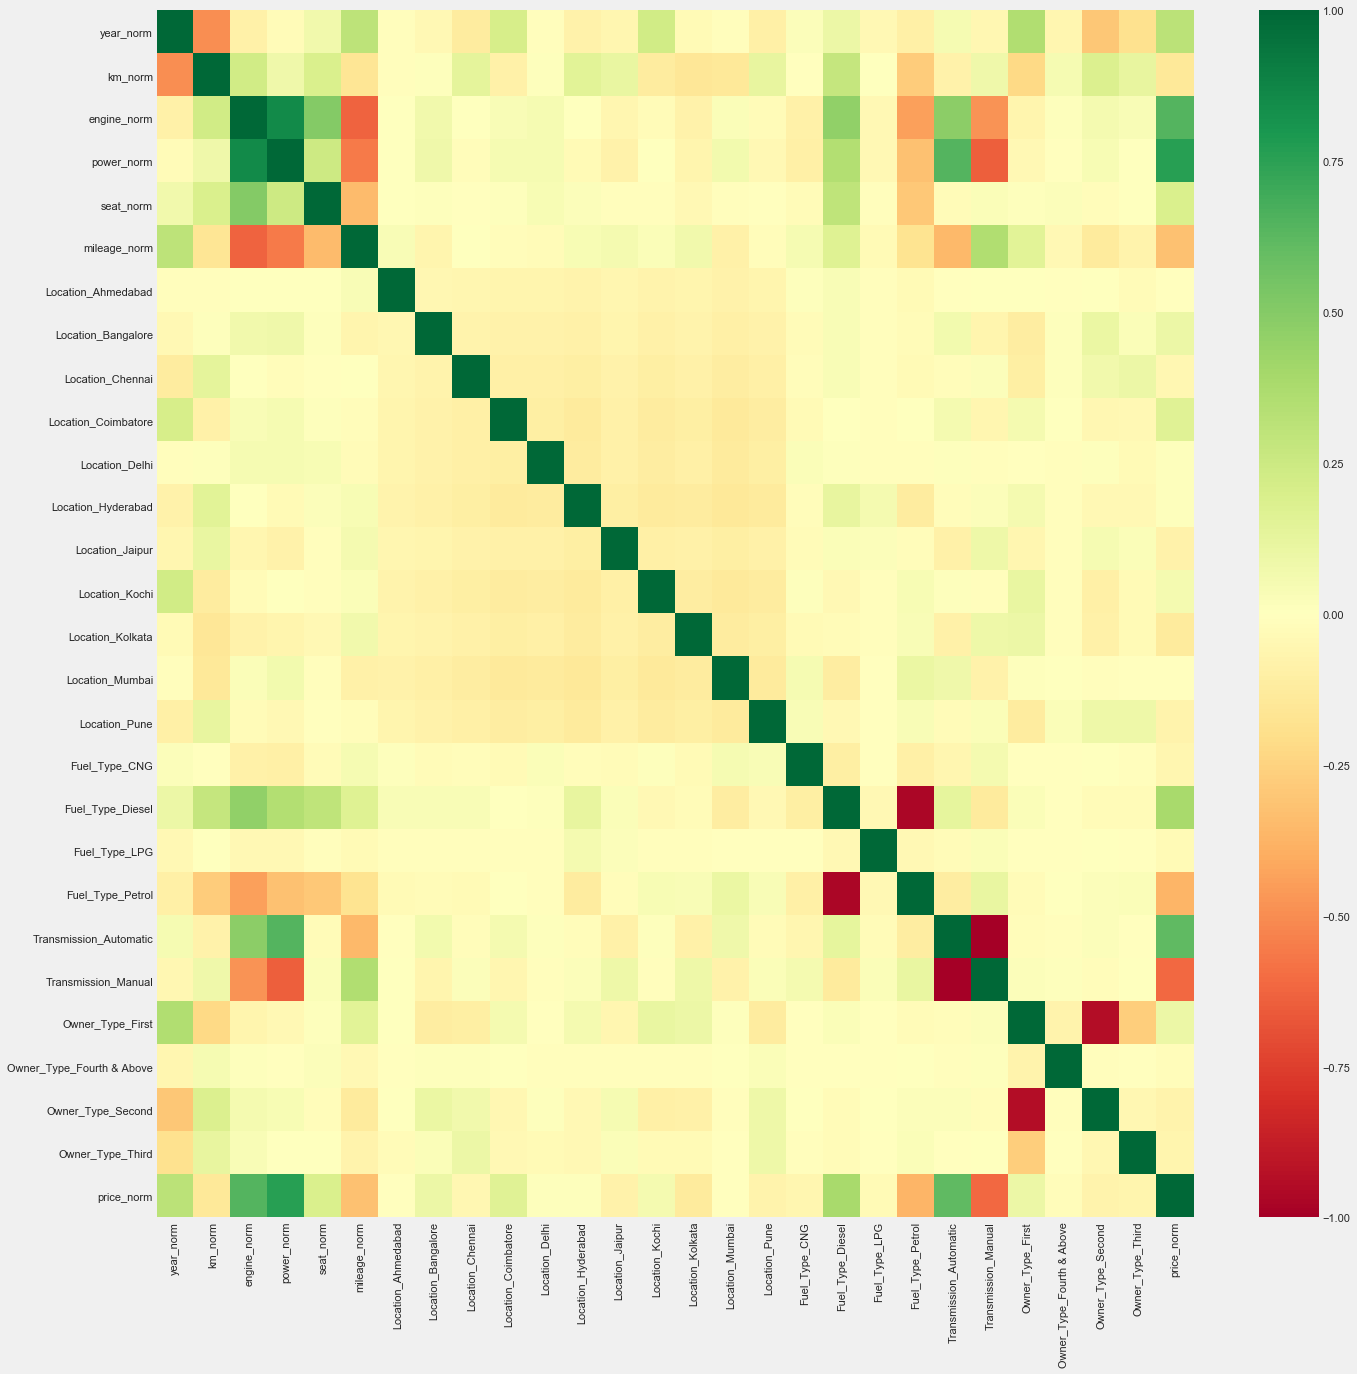

In [53]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="RdYlGn")

# Step 2 : Model Evaluation

Setelah memastikan data sudah siap diolah, assign dataframe `df` menjadi array `x` dan `y`. Kemudian lakukan `train_test_split` untuk menghasilkan validation set. Lanjutkan dengan training lalu implementasi model pada validation set.

## Model Evaluation Ke 1 :  Linear Regressor

In [36]:
x = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state = 1990)

from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

pred = regressor.predict(xtest)
np.set_printoptions(precision=2)
# print(np.concatenate((pred.reshape(len(pred),1), ytest.reshape(len(ytest),1)),1))

#Cek Akurasi Training dan Test Data
print("Accuracy on Training set: ",regressor.score(xtrain,ytrain))
print("Accuracy on Testing set: ",regressor.score(xtest,ytest))

from sklearn.metrics import mean_squared_error,mean_absolute_error
print("Mean squared error: %.4f" % mean_squared_error(ytest, pred))

# The Root mean squared error
print("R Mean squared error: %.4f" % mean_squared_error(ytest, pred, squared=False))

# The mean_absolute_error
MAE_LR=mean_absolute_error(ytest, pred)
print("Mean Absolute error: %.4f" % mean_absolute_error(ytest, pred))

# Explained variance score: 1 is perfect prediction
from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(ytest, pred))

Accuracy on Training set:  0.750500911168643
Accuracy on Testing set:  0.7712604981764388
Mean squared error: 0.0075
R Mean squared error: 0.0868
Mean Absolute error: 0.0592
Variance score: 0.77


## Model Evaluation Ke 2 : Gradient Boosting Regressor

In [37]:
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=1990)

#Fitting simple linear regression to the Training Set
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()
regressor.fit(xtrain, ytrain)

pred = regressor.predict(xtest)
np.set_printoptions(precision=2)
# print(np.concatenate((pred.reshape(len(pred),1), ytest.reshape(len(ytest),1)),1))

#Cek Akurasi
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()
regressor.fit(xtrain, ytrain)
print("Accuracy on Training set: ",regressor.score(xtrain,ytrain))
print("Accuracy on Testing set: ",regressor.score(xtest,ytest))


from sklearn.metrics import mean_squared_error,mean_absolute_error
print("Mean squared error: %.4f" % mean_squared_error(ytest, pred))

# The Root mean squared error
print("R Mean squared error: %.4f" % mean_squared_error(ytest, pred, squared=False))

# The mean_absolute_error
print("Mean Absolute error: %.4f" % mean_absolute_error(ytest, pred))

# Explained variance score: 1 is perfect prediction
from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(ytest, pred))

Accuracy on Training set:  0.9236964656363537
Accuracy on Testing set:  0.9030636706837601
Mean squared error: 0.0032
R Mean squared error: 0.0565
Mean Absolute error: 0.0321
Variance score: 0.90


## Model Evaluation Ke 3 : Random Forest Regressor

In [38]:
#Spliting Training dan Test
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=1990)

#Random Forest Regressor Evaluation
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(xtrain, ytrain)
pred = rf_reg.predict(xtest)

#Cek Akurasi
print("Accuracy on Training set: ",rf_reg.score(xtrain,ytrain))
print("Accuracy on Testing set: ",rf_reg.score(xtest,ytest))


from sklearn.metrics import mean_squared_error,mean_absolute_error
print("Mean squared error: %.4f" % mean_squared_error(ytest, pred))

# The Root mean squared error
print("R Mean squared error: %.4f" % mean_squared_error(ytest, pred, squared=False))

# The mean_absolute_error
MAE_RF = mean_absolute_error(ytest, pred)
print("Mean Absolute error: %.4f" % mean_absolute_error(ytest, pred))

# Explained variance score: 1 is perfect prediction
from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(ytest, pred))

Accuracy on Training set:  0.9873273073583227
Accuracy on Testing set:  0.9259607712668714
Mean squared error: 0.0024
R Mean squared error: 0.0494
Mean Absolute error: 0.0255
Variance score: 0.93


## Hasil Model Linear Regression vs Random Forest Regression

In [54]:
# Merubah MSE tersebut menjadi dalam satuan uang
dfcheck = pd.read_csv('train-data.csv')

dfcheck['Price_Diff_LR']=dfcheck['Price']*MAE_LR # selisih harga menggunakan Model Linear Regression
dfcheck['Price_Diff_RF']=dfcheck['Price']*MAE_RF # selisih harga menggunakan Model Random Forest

Mean_Price_Diff_LR = dfcheck['Price_Diff_LR'].mean() # rata - rata selisih harga menggunakan Model Linear Regression (Lakh)
Mean_Price_Diff_RF = dfcheck['Price_Diff_RF'].mean() # rata - rata selisih harga menggunakan Model Random Forest (Lakh)


print('Rata - rata selisih harga menggunakan Model Linear Regression adalah : %.2f' %Mean_Price_Diff_LR,'lakh')
print('Rata - rata selisih harga menggunakan Model Random Forest adalah : %.2f' %Mean_Price_Diff_RF,'lakh')

print('\natau\n')

Mean_Price_Diff_LR = dfcheck['Price_Diff_LR'].mean()*20287222 # rata - rata selisih harga menggunakan Model Linear Regression (Rupiah)
Mean_Price_Diff_RF = dfcheck['Price_Diff_RF'].mean()*20287222 # rata - rata selisih harga menggunakan Model Random Forest (Rupiah)

print('Rata - rata selisih harga menggunakan Model Linear Regression adalah : %.0f' %Mean_Price_Diff_LR,'Rupiah')
print('Rata - rata selisih harga menggunakan Model Random Forest adalah : %.0f' %Mean_Price_Diff_RF,'Rupiah')

Rata - rata selisih harga menggunakan Model Linear Regression adalah : 0.56 lakh
Rata - rata selisih harga menggunakan Model Random Forest adalah : 0.24 lakh

atau

Rata - rata selisih harga menggunakan Model Linear Regression adalah : 11383256 Rupiah
Rata - rata selisih harga menggunakan Model Random Forest adalah : 4910462 Rupiah
